In [1]:
from src.models.NBC import NBC
from src.models.NBC_TI import NBC_TI
from src.AnalysisHelper import plot_results_3d, confusion_matricies_table, measures
from config import results_path, data_path, data_url, reference_methods_group
import clustbench
import numpy as np
import os

In [2]:
# More datasets: https://clustering-benchmarks.gagolewski.com/weave/data-v1.html#
battery = "wut"
dataset = "mk3"
methods = ["NBC_TI", "NBC", "sklearn_kmeans"]

## Loading benchmark dataset

In [3]:
# Workaround to download data to desired folder
os.chdir(data_path)
benchmark = clustbench.load_dataset(battery, dataset, url=data_url)
os.chdir("..")

# Reference partition of dataset assigned by experts
reference = benchmark.labels[0]
permute = np.array([2, 1, 3, 4, 5, 6, 7, 8])
reference = permute[reference - 1]

## Fetching precomputed clustering results

In [4]:
results = clustbench.load_results(
    reference_methods_group, benchmark.battery, benchmark.dataset, benchmark.n_clusters, path=results_path)
results.keys()

dict_keys(['sklearn_kmeans'])

## NBC clusterization

In [5]:
%%time
model = NBC()
results["NBC"] = clustbench.fit_predict_many(model, benchmark.data, benchmark.n_clusters)

CPU times: total: 0 ns
Wall time: 994 µs


## NBC-TI clusterization

In [6]:
%%time
model = NBC_TI()
results["NBC_TI"] = clustbench.fit_predict_many(model, benchmark.data, benchmark.n_clusters)
results.keys()

CPU times: total: 0 ns
Wall time: 999 µs


dict_keys(['sklearn_kmeans', 'NBC', 'NBC_TI'])

## Comparison

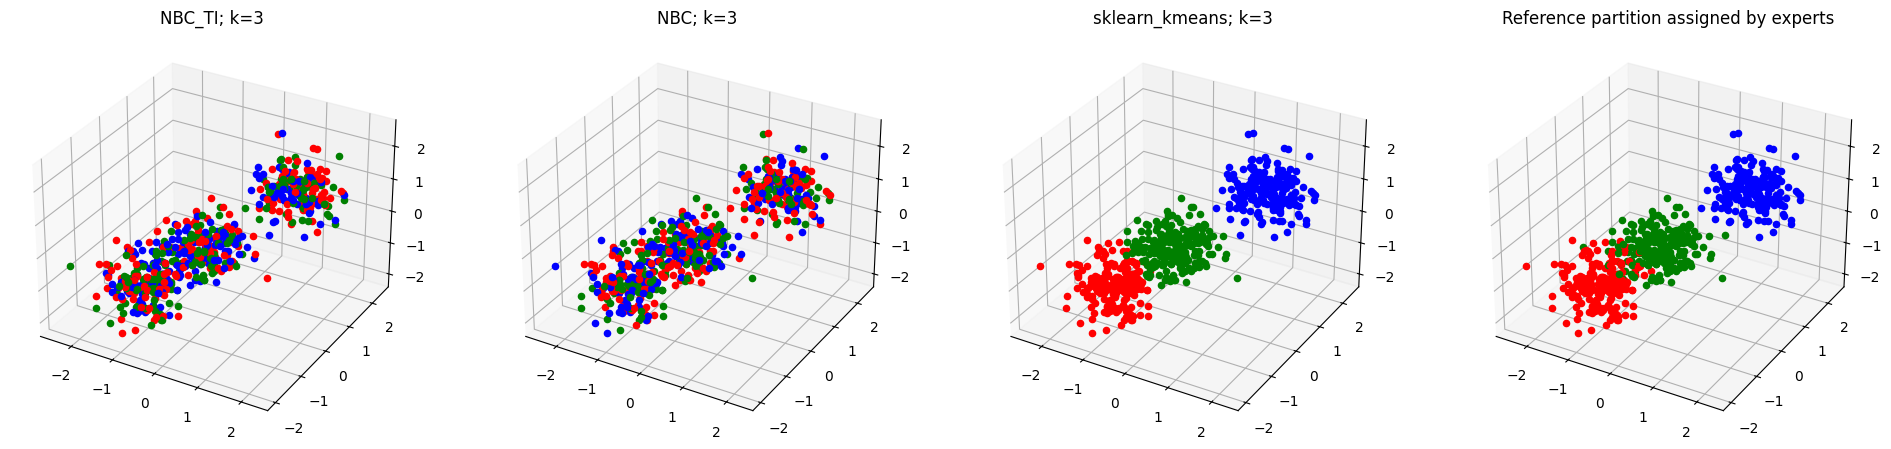

In [7]:
plot_results_3d(benchmark.data, methods, results, reference)

In [8]:
confusion_matricies_table(methods, results, reference)

╒══════════════╤══════════════╤═════════════════════╕
│ NBC_TI k=3:  │ NBC k=3:     │ sklearn_kmeans k=3: │
│ [[65 69 66]  │ [[68 67 65]  │ [[186   0  14]      │
│  [73 61 66]  │  [73 63 64]  │  [  0 200   0]      │
│  [61 77 62]] │  [65 65 70]] │  [  8   1 191]]     │
╘══════════════╧══════════════╧═════════════════════╛


In [9]:
measures(methods, results, reference)

╒═════════════════════════════╤═════════════════════════════╤══════════════════════════╕
│ NBC_TI k=3:                 │ NBC k=3:                    │ sklearn_kmeans k=3:      │
│ ar: -0.0006731612618763118  │ ar: -0.002579646696428691   │ ar: 0.890987693795644    │
│ r: 0.555920979410128        │ r: 0.5550973845297719       │ r: 0.9516249304396216    │
│ fm: 0.33189054669477475     │ fm: 0.33058419782151        │ fm: 0.9272132338371505   │
│ afm: -0.0006731613272118309 │ afm: -0.0025796468265782335 │ afm: 0.8909877387481496  │
│ mi: 0.002618145521493531    │ mi: 0.0007549445265000454   │ mi: 0.9474007873742563   │
│ nmi: 0.0023835265909645247  │ nmi: 0.0006872607398302848  │ nmi: 0.8624630205207836  │
│ ami: -0.0006667444544174037 │ ami: -0.0023680544147481834 │ ami: 0.8620425124480225  │
│ npa: 0.040000000000000036   │ npa: 0.02499999999999991    │ npa: 0.9424999999999999  │
│ psi: 0.03909561375070553    │ psi: 0.024561657730763724   │ psi: 0.9287224839278913  │
│ spsi: 0.03349033816